In [1]:
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline

0.89988789987097673

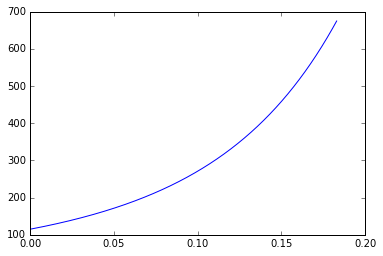

In [3]:
ko = 8.8
E = 35000
Hrxn = 50000
Cpa = 250
To = 300
Cao = 2000
dp = 2.5e-3
pbed = 1200
pc = 2000
De = 1.8e-9
W = 900
Q = 60/3600
Fao = Cao*Q
def dndt(p,W):
    x,T = p
    ki = ko*np.exp(-E/(8.314*T))
    O = ((ki*pc*(dp/2)**2)/De)**0.5
    n = 3/(O**2)*(O/np.tanh(O) - 1)
    dxdw = n*ki*(1-x)/Q
    ra = -n*ki*Fao*(1-x)/Q
    dTdw = ra*Hrxn/(Fao*Cpa)
    return dxdw,dTdw
    
wspan = np.linspace(0,W*2,1001)
ans = odeint(dndt,[0,To],wspan)
x = ans[:,0]
T = ans[:,1]
ki = ko*np.exp(-E/(8.314*T))
O = ((ki*pc*(dp/2)**2)/De)**0.5
n = 3/(O**2)*(O/np.tanh(O) - 1)
ra = -n*ki*Fao*(1-x)/Q
plt.plot(x,1/-ra)
n[-1]


In [31]:
'''e'''

def func(p):
    x,T = p
    ki = ko*np.exp(-E/(8.314*T))
    O = ((ki*pc*(dp/2)**2)/De)**0.5
    n = 3/(O**2)*(O/np.tanh(O) - 1)
    eqn1 = Fao*x - n*ki*Fao*(1-x)*W/Q
    eqn2 = T - To + Hrxn*x/Cpa
    return eqn1, eqn2

x,T = fsolve(func,[0.5,400])
print (x,T)
ki = ko*np.exp(-E/(8.314*T))
O = ((ki*pc*(dp/2)**2)/De)**0.5
n = 3/(O**2)*(O/np.tanh(O) - 1)
n

0.777666414833 455.533282967


0.07592803815461463

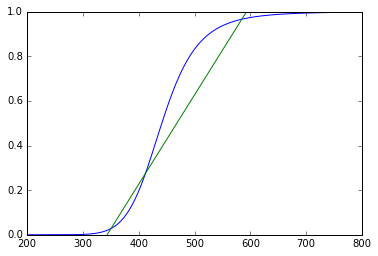

In [18]:
"""4 c"""
To = 343.15
Hrxn = -25000
Q = 200/60
FAo = 50
CAo = 15
ko = 45292.29237
# ko = 10000
E = 50000
# E = 35000
CPa = 100
R = 8.314
# Ccat = 0.25
Ccat = 0.12226
CA = np.linspace(0.99999999,0.0000000001,1001)*CAo
X = (CAo - CA)/CAo
Theat = To - Hrxn*FAo*X/(FAo*CPa)
V = 500
def mole(T,X):
    FA = FAo*(1-X)
    ln = np.log((FAo - FA)/(ko*Ccat*(FA/Q)*V))
    eqn1 = T + E/(R*ln)
    return (eqn1)
Tmole = []
T = 500
for x in X:
    T = fsolve(mole,[T],args = (x))
    Tmole.append(T[0])

plt.plot(Tmole,X)
plt.plot(Theat,X)
plt.xlim([200,800])
plt.show()

0.0600237938805
0.103575952387
0.343429883424


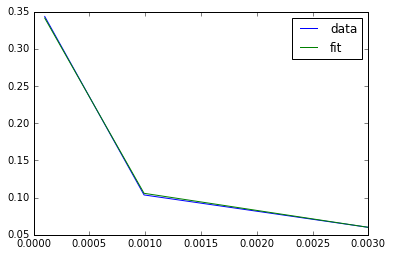

In [38]:
"""6"""

def func(p,arg):
    kc,Cas = p
    x,d = arg
    eqn1 = 10*x - 2.4e-5*(6/(1200*d))*(Cas**2)*5e-3
    eqn2 = 10*x - kc*(6/(1200*d))*(6000*(1-x) - Cas)*5e-3
    return eqn1,eqn2
KC = []

kc,Cas = fsolve(func,[1e-3,1000],args = ([0.132,3e-3]))
KC.append(kc)
print (kc)
kc,Cas = fsolve(func,[1e-3,1000],args = ([0.362,0.99e-3]))
print (kc)
KC.append(kc)
kc,Cas = fsolve(func,[1e-3,1000],args = ([0.793,0.1e-3]))
print (kc)
KC.append(kc)
dp = np.array([3e-3,0.99e-3,0.1e-3])
plt.plot(dp,KC,label = 'data')
n = 0.511
plt.plot(dp,0.0600237938805*3e-3**n/dp**n,label = 'fit' )
plt.legend()